In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%run Exctracting_Features.ipynb


In [3]:
training_set = label1

In [4]:
# training_set = ['images/1,000AMD_1.jpg','images/1,000AMD_2.jpg','images/1,000AMD_3.jpg','images/1,000AMD_4.jpg',
#                 'images/1,000AMD_5.jpg','images/1,000AMD_6.jpg','images/1,000AMD_7.jpg','images/1,000AMD_8.jpg',
#                 'images/1,000AMD_9.jpg','images/1,000AMD_10.jpg','images/1,000AMD_11.jpg','images/1,000AMD_12.jpg',
#                 'images/1,000AMD_13.jpg','images/1,000AMD_14.jpg','images/1,000AMD_15.jpg','1,000_16.jpg',
                
#                'images/2,000AMD_1.jpg','images/2,000AMD_2.jpg','images/5,000AMD_1.jpg','images/5,000AMD_2.jpg',
#                'images/5,000AMD_3.jpg','images/5,000AMD_4.jpg','images/10,000AMD_1.jpg','images/10,000AMD_2.jpg',
#                'images/10,000AMD_3.jpg','images/10,000AMD_4.jpg','images/20,000AMD_1.jpg','images/20,000AMD_2.jpg',
#                'images/20,000AMD_3.jpg','images/20,000AMD_4.jpg','images/50,000AMD_1.jpg','images/50,000AMD_2.jpg',
#                'images/50,000AMD_3.jpg','images/50,000AMD_4.jpg', 'images/100,000AMD_1.jpg','images/100,000AMD_2.jpg']

In [4]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(8,14))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [10]:


test = cv2.imread("test/5000AMD.jpg")
img = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)


Detected denomination: Rs.  5000AMD.
Image written to file-system :  True


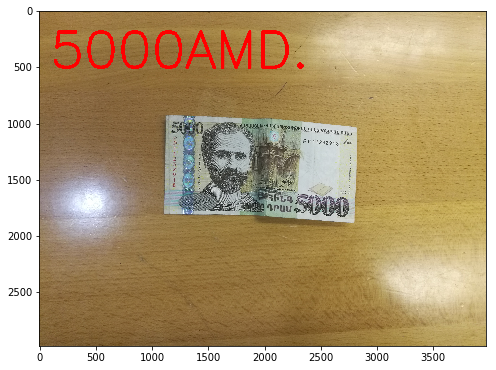

In [12]:
max_val = 8
max_pt = -1
max_kp = 0

orb = cv2.ORB_create()




test_img = cv2.cvtColor(test, cv2.COLOR_RGB2GRAY)
##cv2.resize(test_img, None, fx=0.4, fy=0.4, interpolation = cv2.INTER_AREA)
# create a mask using the alpha channel of the original image--don't
# use transparent or partially transparent parts

# keypoints and descriptors
(kp1, des1) = orb.detectAndCompute(test_img, None)



for i in range(0, len(training_set)):
    # train image
    train_img = cv2.imread(training_set[i], cv2.IMREAD_GRAYSCALE)

    (kp2, des2) = orb.detectAndCompute(train_img, None)

    # brute force matcher
    bf = cv2.BFMatcher()
    all_matches = bf.knnMatch(des1, des2, k=2)

    good = []
    # give an arbitrary number -> 0.789
    # if good -> append to list of good matches
    for (m, n) in all_matches:
        if m.distance < 0.8 * n.distance:
            good.append([m])

    if len(good) > max_val:
        max_val = len(good)
        max_pt = i
        max_kp = kp2

#     print(i, ' ', training_set[i], ' ', len(good))

if max_val != 8 :
#     print(training_set[max_pt])
#     print('good matches ', max_val)
    rain_img = cv2.imread(training_set[max_pt])
    img3 = cv2.drawMatchesKnn(test_img, kp1, train_img, max_kp, good, 4)
    
    note = str(training_set[max_pt])[7:-3]
    print('\nDetected denomination: Rs. ', note)
    
    
    cv2.putText(img, note,(100,500), cv2.FONT_HERSHEY_SIMPLEX, 15,(255,0,0),30,cv2.LINE_AA)

    status = cv2.imwrite('20AMD.jpg',img)
    print("Image written to file-system : ",status)

    display_img(img)
    
        
    
#     (plt.imshow(img3), plt.show())
else:
    print('No Matches')